# One Class SVM

In [2]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
from scipy.ndimage import median_filter

# Load data
train_data = np.load("/home/haoqian/anomaly/Anomaly-TransformerX/dataset/SMD/SMD_train.npy")
test_data = np.load("/home/haoqian/anomaly/Anomaly-TransformerX/dataset/SMD/SMD_test.npy")
test_labels = np.load("/home/haoqian/anomaly/ml/fusion/SMD_test_label.npy")

# Preprocessing
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Feature engineering
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train_data_scaled)
test_pca = pca.transform(test_data_scaled)

# Combine features
train_combined = np.hstack([train_data_scaled, train_pca])
test_combined = np.hstack([test_data_scaled, test_pca])

# Model with tuned parameters
ocsvm = OneClassSVM(
    kernel='rbf',              # RBF kernel
    gamma='auto',              # Automatically determine gamma
    nu=0.05                   # Upper bound on the fraction of margin errors
)

# Fit the model
ocsvm.fit(train_combined)

# Predict and post-process
test_scores = ocsvm.decision_function(test_combined)  # Get anomaly scores
test_predictions = np.where(test_scores < 0, 1, 0)  # Negative scores are anomalies
test_predictions = median_filter(test_predictions, size=5)  # Smooth predictions
test_scores = -test_scores  # Convert scores for evaluation

# Evaluation
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)
accuracy = accuracy_score(test_labels, test_predictions)
auc_roc = roc_auc_score(test_labels, test_predictions)
ap_score = average_precision_score(test_labels, test_predictions)

print("=== One-Class SVM Model Performance ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC ROC Score: {auc_roc:.4f}")
print(f"Average Precision Score: {ap_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions))
12.34,33,17,17.19,61.48,87.43

=== One-Class SVM Model Performance ===
Precision: 0.1234
Recall: 0.3317
F1 Score: 0.1799
AUC ROC Score: 0.6148
Average Precision Score: 0.0687
Accuracy: 0.8743

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93    678976
         1.0       0.12      0.33      0.18     29444

    accuracy                           0.87    708420
   macro avg       0.55      0.61      0.56    708420
weighted avg       0.93      0.87      0.90    708420



In [8]:
test_scores=-test_scores

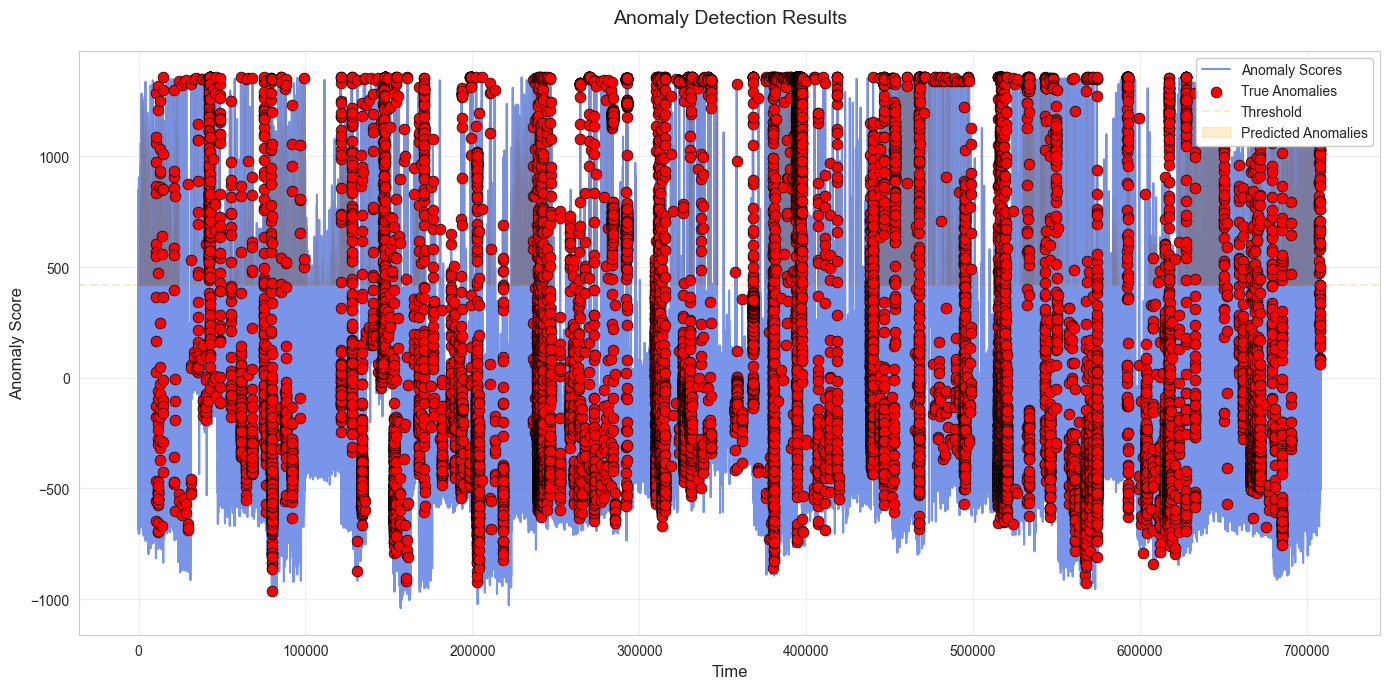

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Plot anomaly scores
plt.plot(test_scores, label='Anomaly Scores', color='royalblue', alpha=0.7, linewidth=1.5)

# Highlight true anomalies
anomaly_points = np.where(test_labels == 1)[0]
plt.scatter(anomaly_points, 
            test_scores[test_labels == 1], 
            color='red', 
            label='True Anomalies', 
            s=60,
            edgecolor='black',
            linewidth=0.5,
            zorder=3)

# Add threshold line if you have one
threshold = np.percentile(test_scores, 95)  
plt.axhline(y=threshold, color='darkorange', linestyle='--', 
            linewidth=1.5, alpha=0.2, label='Threshold')


plt.fill_between(range(len(test_scores)), 
                 test_scores, 
                 threshold, 
                 where=(test_scores > threshold),
                 color='orange', 
                 alpha=0.2, 
                 label='Predicted Anomalies')

# Add labels and title
plt.title('Anomaly Detection Results', fontsize=14, pad=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Anomaly Score', fontsize=12)

# Improve legend and grid
plt.legend(loc='upper right', framealpha=1)
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# FUsion Feature

In [11]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
from scipy.ndimage import median_filter

# Load data
train_data = np.load("/home/haoqian/anomaly/ml/fusion/fusion_train.npy")
test_data = np.load("/home/haoqian/anomaly/ml/fusion/fusion_test.npy")
test_labels = np.load("/home/haoqian/anomaly/ml/fusion/SMD_test_label.npy")

# Preprocessing
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Feature engineering
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train_data_scaled)
test_pca = pca.transform(test_data_scaled)

# Combine features
train_combined = np.hstack([train_data_scaled, train_pca])
test_combined = np.hstack([test_data_scaled, test_pca])

# Model with tuned parameters
ocsvm = OneClassSVM(
    kernel='rbf',              # RBF kernel
    gamma='auto',              # Automatically determine gamma
    nu=0.05,                   # Upper bound on the fraction of margin errors
)

# Fit the model
ocsvm.fit(train_combined)

# Predict and post-process
test_scores = ocsvm.decision_function(test_combined)  # Get anomaly scores
test_predictions = np.where(test_scores < 0, 1, 0)  # Negative scores are anomalies
test_predictions = median_filter(test_predictions, size=5)  # Smooth predictions
test_scores = -test_scores  # Convert scores for evaluation

# Evaluation
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)
accuracy = accuracy_score(test_labels, test_predictions)
auc_roc = roc_auc_score(test_labels, test_predictions)
ap_score = average_precision_score(test_labels, test_predictions)

print("=== One-Class SVM Model Performance ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC ROC Score: {auc_roc:.4f}")
print(f"Average Precision Score: {ap_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions))
13.92&54.94&22.21&70.11&84.01

=== One-Class SVM Model Performance ===
Precision: 0.1392
Recall: 0.5494
F1 Score: 0.2221
AUC ROC Score: 0.7011
Average Precision Score: 0.0952
Accuracy: 0.8401

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91    678976
         1.0       0.14      0.55      0.22     29444

    accuracy                           0.84    708420
   macro avg       0.56      0.70      0.57    708420
weighted avg       0.94      0.84      0.88    708420

